### Basic example on how to use OMERO Python language bindings
See https://docs.openmicroscopy.org/latest/omero/developers/Python.html

### Import Packages required to connect to OMERO

In [2]:
from omero.gateway import BlitzGateway
from getpass import getpass
import ezomero
import matplotlib.pyplot as plt

In [3]:
HOST = 'omero-int.biotec.tu-dresden.de'
image_id = 178 # blobs
image_id = 416 # large image
dataset_id = 152 # sample dataset

In [4]:
conn = ezomero.connect(host=HOST, user=input("Username: "),
               password=getpass("OMERO Password: "), port=4064)

In [5]:
omero_image, image = ezomero.get_image(conn, image_id, no_pixels=True) # shape follows TZYXC

In [6]:
image_shape = (omero_image.getSizeT(), omero_image.getSizeZ(), omero_image.getSizeY(), omero_image.getSizeX(), omero_image.getSizeC())
image_shape

(1, 1, 18549, 22194, 1)

In [7]:
omero_image, image = ezomero.get_image(conn, image_id,
                                       start_coords=(5000, 5000, 0, 0, 0),
                                       axis_lengths=(10, 10, 1, 1, 1)) # assumes XYZCT ordering

In [8]:
parent_dataset_id = omero_image.getAncestry()[0].id
parent_dataset_id

179

In [9]:
image.shape

(1, 1, 10, 10, 1)

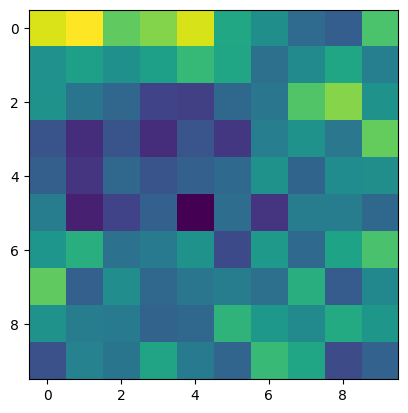

In [10]:
plt.imshow(image[0,0,:,:,0])

In [11]:
ezomero.post_image(conn, image, image_name='crop', dataset_id=parent_dataset_id)

2848

In [12]:
conn.close()